<a href="https://colab.research.google.com/github/faris11/SimpleMLModel/blob/main/Regresi_%26_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Petunjuk**

Program ini merupakan program yang untuk melakukan tugas regresi berganda dan klasifikasi.<br>
Tahapan untuk menjalankan program ini terdiri dari Data Preparation, Regresi, dan Klasifikasi.<br>
1. **Data preparation**, pada tahap ini terdapat proses pengumpulan data, telaah data, validasi data, pembersihaan data, penentuan objek data, dan kontruksi data
2. **Regresi**, pada tahap ini terdapat proses untuk melakukan labeling, pembagian data, pembangunan model, dan evaluasi model. Data yang diprediksi pada kasus ini yaitu pada fitur *math score*.
3. **Klasifikasi**, pada tahap ini terdapat proses yang hampir sama dengan regresi yaitu labeling, pembagian data, pembangunan model, dan evaluasi model. Perbedaannya adalah pada data yang dilakukan prediksi yaitu fitur *test preparation course*.

Apabila ingin menjalankan program, klik dropdown pada bar di bagian kanan atas dan pilih *Hubungkan ke runtime yang dihosting*. Selanjutnya, klik tombol play pada setiap sel sesuai dengan tahapan.



# **Data Preparation**

**Pengumpulan Data**<br>
Data yang digunakan merupakan data prediksi performa siswa dalam bidang matematika. Data yang digunakan bersumber dari https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data <br>

Deskripsi data yang digunakan dijelaskan sebagai berikut:
* **Gender**: The gender of the student (male/female)
* **Race/ethnicity**: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)
* **Parental level of education**: The highest level of education attained by the student's parent(s) or guardian(s)
* **Lunch**: Whether the student receives free or reduced-price lunch (yes/no)
* **Test preparation course**: Whether the student completed a test preparation course (yes/no)
* **Math score**: The student's score on a standardized mathematics test
* **Reading score**: The student's score on a standardized reading test
* **Writing score**: The student's score on a standardized writing test



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [99]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Certified Assoc Data Science/Student Performance Prediction.csv')
dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,females,group D,some college,standard,completed,NaN,70,78
1,males,group D,associate's degree,standard,none,96.0,?,87
2,female,group D,some college,free/reduced,none,57.0,76,77
3,male,group B,some college,free/reduced,none,70.0,70,63
4,female,group D,associate's degree,standard,none,83.0,85,86


**Telaah Data**

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1002 non-null   object 
 1   race/ethnicity               1002 non-null   object 
 2   parental level of education  1002 non-null   object 
 3   lunch                        1002 non-null   object 
 4   test preparation course      1002 non-null   object 
 5   math score                   1001 non-null   float64
 6   reading score                1002 non-null   object 
 7   writing score                1002 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.8+ KB


In [115]:
dataset.describe()

,math score,writing score
count,1001.000000,1002.000000
mean,67.821179,69.108782
std,15.248049,15.031939
min,15.000000,15.000000
25%,58.000000,59.000000
50%,68.000000,70.000000
75%,80.000000,80.000000
max,100.000000,100.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

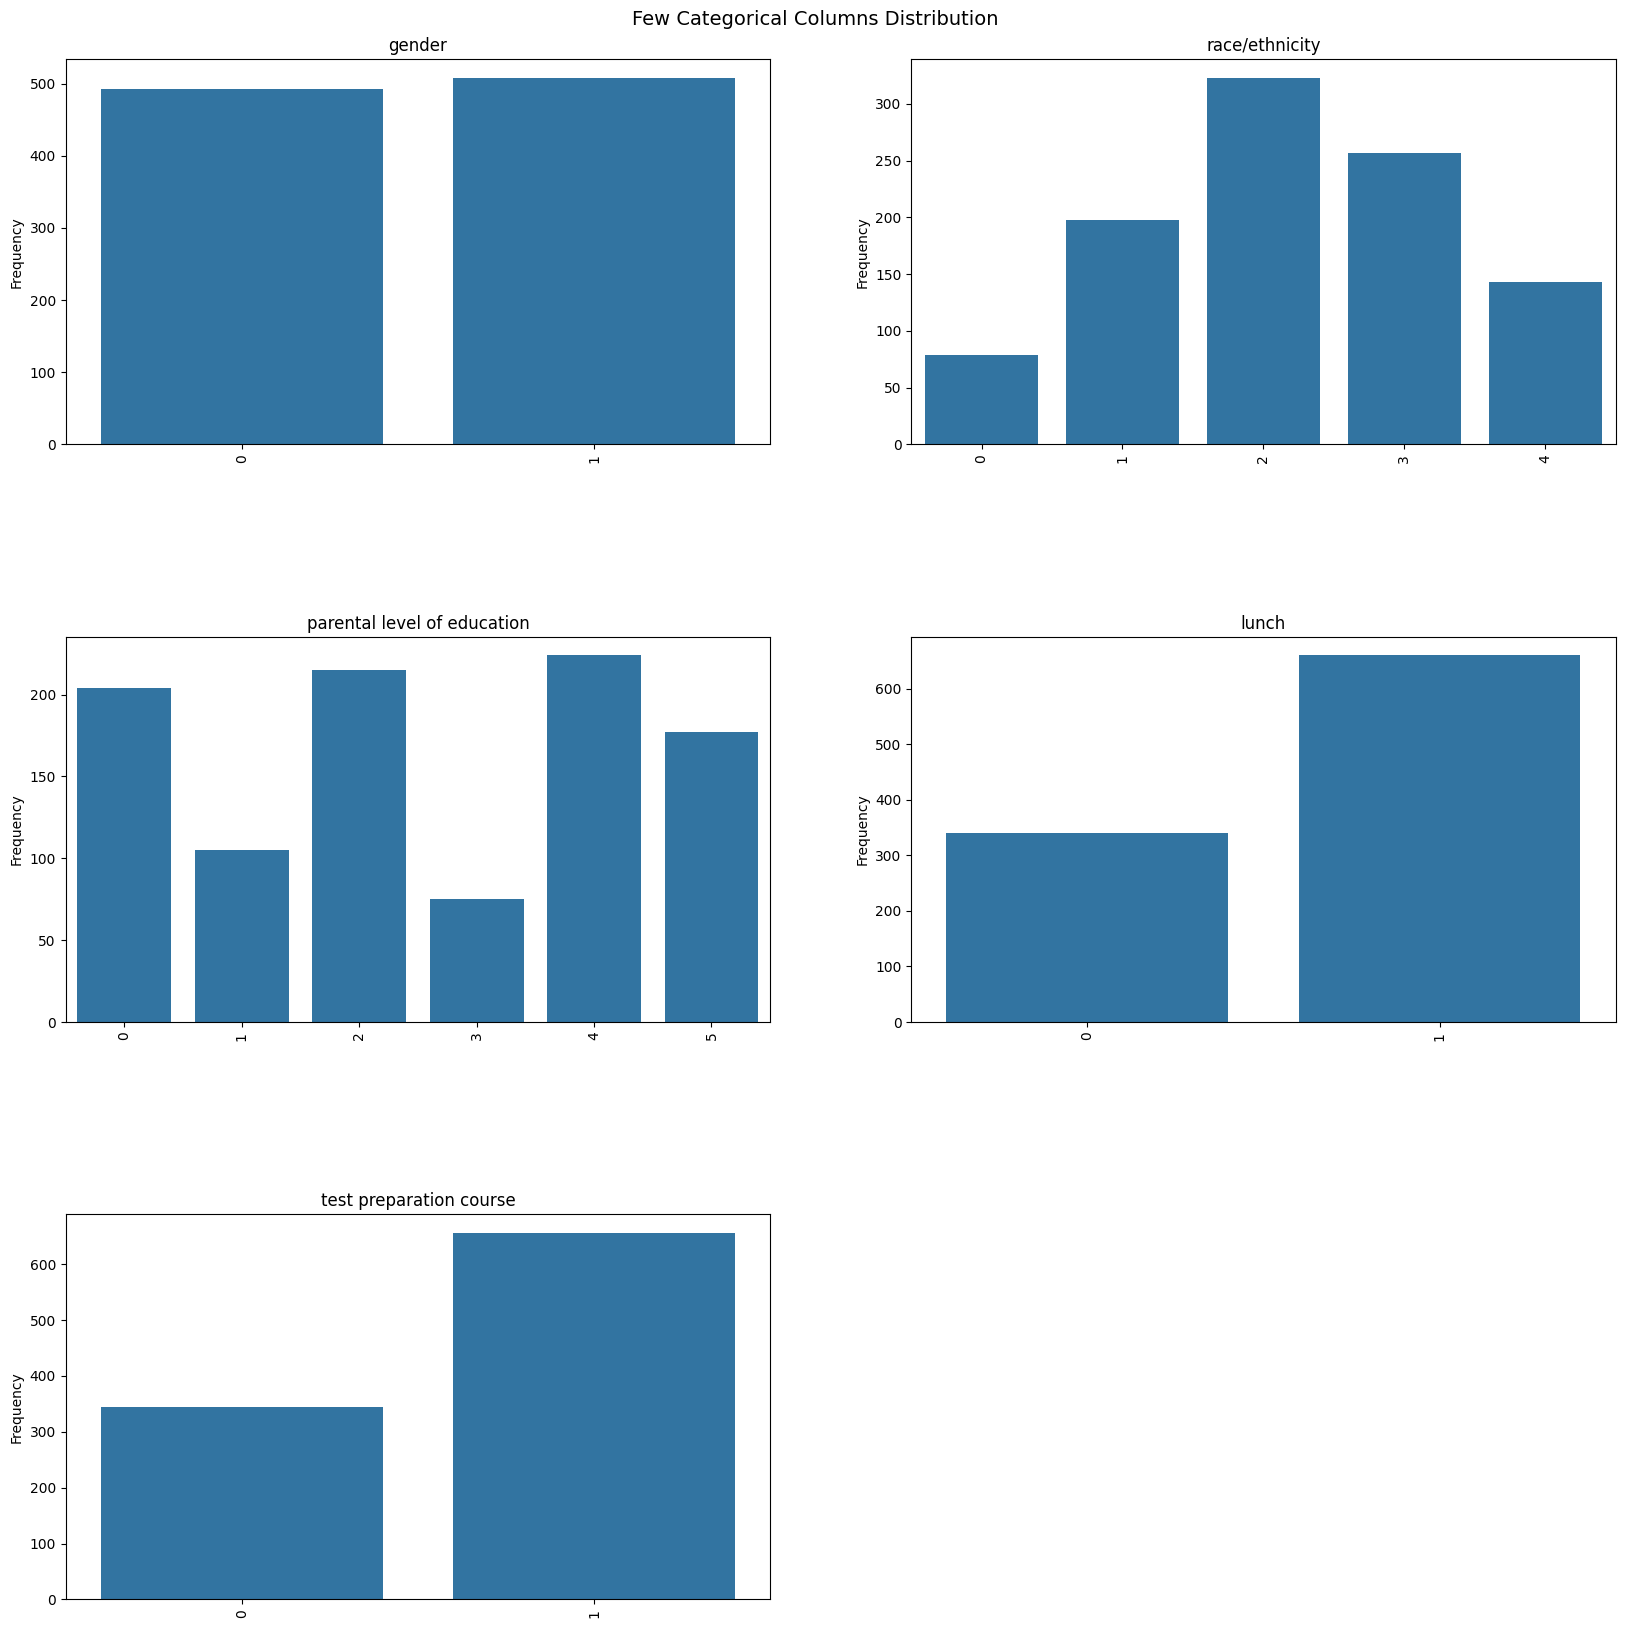

In [131]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.countplot(x=col, data=dataset, ax=axes[r, c])
    for container in axes[r, c].containers:
      #axes[r, c].bar_label(container, label_type="edge")
      axes[r, c].set_ylabel("Frequency")
      axes[r, c].set_xlabel("")
      axes[r, c].tick_params(axis='x', rotation=90)
      axes[r, c].set_title(f"{cat_cols[i]}")

if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Few Categorical Columns Distribution", va="center", ha="center", fontsize=14)
plt.show()

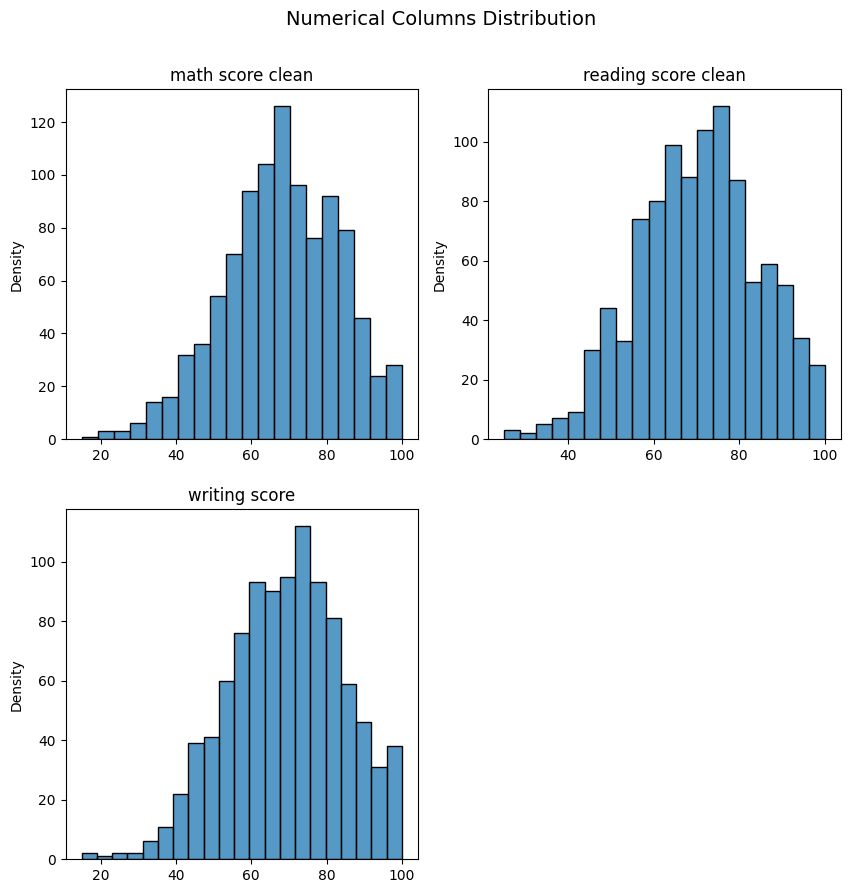

In [132]:
#num_cols = ["math score","reading score","writing score"]
num_cols = ["math score clean","reading score clean","writing score"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(num_cols):
    r, c=i//2, i%2
    sns.histplot(x=col, data=dataset, ax=axes[r,c])
    axes[i//2,i%2].set_xlabel("")
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col}")

if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

fig.text(0.5, 0.95,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()

**Validasi Data**

In [118]:
# Check for missing values
print(dataset.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  0
writing score                  0
dtype: int64


In [119]:
# Check for isna
dataset.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False


In [120]:
# Check for duplicates
n_duplicates = dataset.duplicated()
print("Jumlah Data Duplikat:", n_duplicates.sum())
dataset[n_duplicates].index

Jumlah Data Duplikat: 2


Index([999, 1001], dtype='int64')

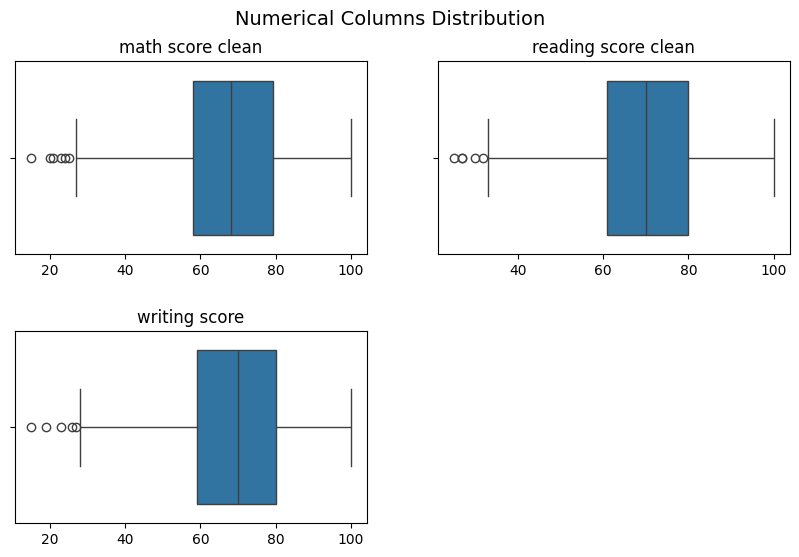

In [130]:
#num_cols = ["math score", "reading score", "writing score"]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, col in enumerate(num_cols):
    r = i // 2
    c = i % 2
    sns.boxplot(x=col, data=dataset, ax=axes[r, c])
    for container in axes[r, c].containers:
      #axes[r, c].set_ylabel("Frequency")
      axes[r, c].set_xlabel("")
      #axes[r, c].tick_params(axis='x', rotation=90)
      axes[r, c].set_title(f"{num_cols[i]}")
      axes[r, c].figure.set_size_inches(10, 6)

if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.95, "Numerical Columns Distribution", va="center", ha="center", fontsize=14)
plt.show()

**Pembersihan Data**<br>
Pada tahap ini dilakukan pembersihan data dengan beberapa cara sebagai berikut:
1. Menghapus duplikasi data
2. Penanganan missing value (mean)
3. Mengkonversi tipe data
4. Mengkoreksi ejaan (data kategorikal)

In [122]:
# Menghapus duplikasi data
dataset.drop_duplicates(inplace=True)

print("Jumlah Data Duplikat:", dataset.duplicated().sum())

Jumlah Data Duplikat: 0


In [123]:
# Penanganan missing value
dataset["math score clean"] = dataset["math score"].fillna(dataset["math score"].median())

dataset["reading score clean"] = dataset["reading score"].apply(lambda x: x if x!='?' else 0)
dataset["reading score clean"] = dataset["reading score clean"].apply(lambda x: x if x!=0 else dataset["reading score clean"].median())

dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score clean,reading score clean
0,females,group D,some college,standard,completed,NaN,70,78,68.0,70
1,males,group D,associate's degree,standard,none,96.0,?,87,96.0,70.0
2,female,group D,some college,free/reduced,none,57.0,76,77,57.0,76
3,male,group B,some college,free/reduced,none,70.0,70,63,70.0,70
4,female,group D,associate's degree,standard,none,83.0,85,86,83.0,85


In [124]:
# Mengkonversi tipe data
dataset["math score clean"] = dataset["math score clean"].astype("int")
dataset["reading score clean"] = dataset["reading score clean"].astype("int")
print(dataset.dtypes)

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                   object
writing score                    int64
math score clean                 int64
reading score clean              int64
dtype: object


In [125]:
# Mengoreksi ejaan (data kategorikal)
dataset['gender'] = dataset['gender'].replace({'females': 'female', 'males': 'male'})
dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score clean,reading score clean
0,female,group D,some college,standard,completed,NaN,70,78,68,70
1,male,group D,associate's degree,standard,none,96.0,?,87,96,70
2,female,group D,some college,free/reduced,none,57.0,76,77,57,76
3,male,group B,some college,free/reduced,none,70.0,70,63,70,70
4,female,group D,associate's degree,standard,none,83.0,85,86,83,85


**Penentuan Objek Data**
1. Kriteria pemilihan data berdasarkan kualitas data (penilaian terhadap nilai mencurigakan, kosong, inkonsisten, duplikasi maupun ambigu, korelasi antar atribut).
2. Metode yang digunakan correlation matrix
3. Semua atribut dalam dataset akan digunakan sepenuhnya




In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
label_encoders={}
for col in cat_cols:
  le=LabelEncoder()
  dataset[col]=le.fit_transform(dataset[col])
  label_encoders[col]=le

print("Label Encoding the category columns:")
display(dataset.head())

print("\nEncoding details:")
for column, encoder in label_encoders.items():
    print(f"{column} Label Encoder Classes: {encoder.classes_}")

Label Encoding the category columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score clean,reading score clean
0,0,3,4,1,0,NaN,70,78,68,70
1,1,3,0,1,1,96.0,?,87,96,70
2,0,3,4,0,1,57.0,76,77,57,76
3,1,1,4,0,1,70.0,70,63,70,70
4,0,3,0,1,1,83.0,85,86,83,85



Encoding details:
gender Label Encoder Classes: ['female' 'male']
race/ethnicity Label Encoder Classes: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education Label Encoder Classes: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch Label Encoder Classes: ['free/reduced' 'standard']
test preparation course Label Encoder Classes: ['completed' 'none']


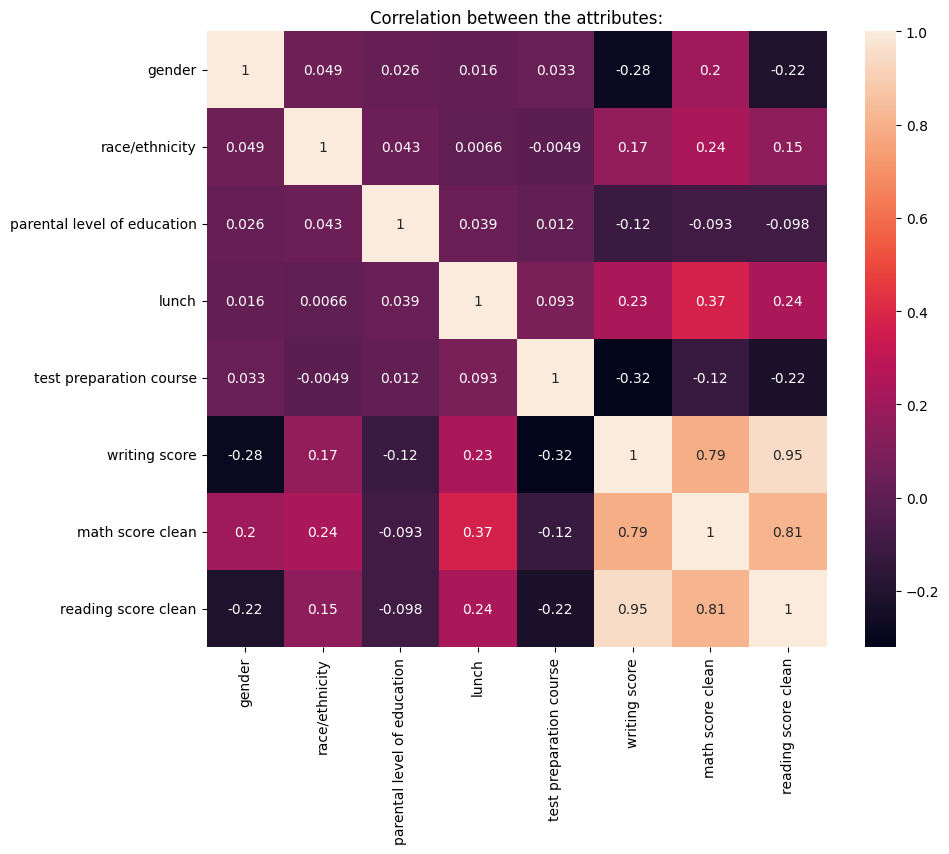

In [128]:
plt.figure(figsize=(10,8))
plt.title('Correlation between the attributes:')
sns.heatmap(dataset.drop(columns=["math score","reading score"]).corr(),annot=True)
plt.show()

* Nilai Korelasi Positif (0 < r ≤ 1):
r = 1: Korelasi positif sempurna, yang berarti jika satu variabel meningkat, variabel lain juga meningkat secara proporsional.

* Nilai Korelasi Negatif (-1 ≤ r < 0):
r = -1: Korelasi negatif sempurna, yang berarti jika satu variabel meningkat, variabel lain menurun secara proporsional.

* Nilai Korelasi Nol (r = 0):
Tidak ada korelasi linear antara dua variabel. Kedua variabel tersebut tidak menunjukkan hubungan linear yang signifikan.

**Konstruksi Data**
2. Kolom data baru yang merupakan turunan diantaranya adalah ...



In [129]:
print(dataset[["math score clean","reading score clean","writing score"]].var())

math score clean       232.490730
reading score clean    198.506626
writing score          225.778178
dtype: float64


Nilai varians antar fitur tidak berbeda jauh, sehingga tidak perlu dilakukan standarisasi data

In [ ]:
cleaned_dataset = dataset.drop(columns=["math score","reading score"])
cleaned_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Certified Assoc Data Science/cleaned_dataset.csv', index=False)

In [3]:
cleaned_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Certified Assoc Data Science/cleaned_dataset.csv')
cleaned_dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,math score clean,reading score clean
0,0,3,4,1,0,78,68,70
1,1,3,0,1,1,87,96,70
2,0,3,4,0,1,77,57,76
3,1,1,4,0,1,63,70,70
4,0,3,0,1,1,86,83,85


# **Regresi**

**Pelabelan Data**

In [133]:
y=cleaned_dataset["math score clean"]
x=cleaned_dataset.drop("math score clean", axis=1)
print(f"Input variables: {x.shape}")
#display(x)
print(f"Output: {y.shape}")
#display(y)

Input variables: (1000, 7)
Output: (1000,)


In [134]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,reading score clean
0,0,3,4,1,0,78,70
1,1,3,0,1,1,87,70
2,0,3,4,0,1,77,76
3,1,1,4,0,1,63,70
4,0,3,0,1,1,86,85
...,...,...,...,...,...,...,...
995,1,2,4,1,1,71,77
996,1,2,4,1,1,66,66
997,0,0,2,1,0,86,86
998,1,4,2,1,1,62,72


**Skenario Model**

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Testing output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Shapes after train-test split:
Training input: (800, 7)
Testing input: (200, 7)
Testing output: (800,)
Testing output: (200,)


Mean Squared Error (MSE)<br>
```
MSE = (1/n) * Σ(yi - ŷi)^2
```
Root Mean Squared Error (RMSE)<br>
```
RMSE = √MSE
```
Mean Absolute Error (MAE)<br>
```
MAE = (1/n) * Σ|yi - ŷi|
```
Mean Absolute Percentage Error (MAPE)<br>
```
MAE = (1/n) * Σ|(yi - ŷi)/yi|*100%
```
R-squared (R2)
```
# R2 = 1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)
```



**Membangun Model**

In [136]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

regressor = [
    ('LinReg', LinearRegression()),
    ('SVReg', SVR()),
    ('RFReg', RandomForestRegressor()),
    ('DTReg', DecisionTreeRegressor()),
    ('KNReg', KNeighborsRegressor())
]

results = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': [],
    'R2': []
}

mse_scores=[]
rmse_scores=[]
mae_scores=[]
mape_scores=[]
r2_scores=[]

for name, model in regressor:
  display(model)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  mse=mean_squared_error(y_test, y_pred)
  rmse=np.power(mse,1/2)
  mae=mean_absolute_error(y_test, y_pred)
  mape=mean_absolute_percentage_error(y_test, y_pred)
  r2=r2_score(y_test, y_pred)

  results['Model'].append(name)
  results['MSE'].append(mse)
  results['RMSE'].append(rmse)
  results['MAE'].append(mae)
  results['MAPE'].append(mape)
  results['R2'].append(r2)

  mse_scores.append(mse)
  rmse_scores.append(rmse)
  mae_scores.append(mae)
  mape_scores.append(mape)
  r2_scores.append(r2)
  print("\n")

LinearRegression()

SVR()

RandomForestRegressor()

DecisionTreeRegressor()

KNeighborsRegressor()

In [137]:
results_df = pd.DataFrame(results)
results_df

,Model,MSE,RMSE,MAE,MAPE,R2
0,LinReg,25.979319,5.096991,4.216215,0.066358,0.882321
1,SVReg,92.885725,9.637724,7.893840,0.128052,0.579253
2,RFReg,32.523511,5.702939,4.619450,0.072748,0.852677
3,DTReg,63.790000,7.986864,6.070000,0.095916,0.711049
4,KNReg,79.615600,8.922757,7.184000,0.113738,0.639363


In [138]:
min_mse = results_df['MSE'].min()
print(f"Best MSE Score Recorded: {min_mse}")
min_rmse = results_df['RMSE'].min()
print(f"Best RMSE Score Recorded: {min_rmse}")
min_mae = results_df['MAE'].min()
print(f"Best MAE Score Recorded: {min_mae}")
min_mape = results_df['MAPE'].min()
print(f"Best MAPE Score Recorded: {min_mape}")
max_r2= results_df['R2'].max()
print(f"Best R2 Score Recorded: {max_r2}")

max_r2_idx=r2_scores.index(max_r2)
best_reg=regressor[max_r2_idx]
print(f"Best Model Performance: {best_reg[1]}")

Best MSE Score Recorded: 25.97931868735592
Best RMSE Score Recorded: 5.096991140600101
Best MAE Score Recorded: 4.216214611865795
Best MAPE Score Recorded: 0.06635783060157956
Best R2 Score Recorded: 0.8823208020543398
Best Model Performance: LinearRegression()


**Evaluasi Hasil Pemodelan**

In [139]:
print("Masukan data baru untuk diprediksi:")
encoded_values = {}
gender = "male"
race = "group C"
parental_level_of_education = "some college"
lunch = "standard"
test_preparation_course = "none"
writing_score = 71
reading_score = 77

print([gender,race,parental_level_of_education,lunch,test_preparation_course,writing_score,reading_score])

Masukan data baru untuk diprediksi:
['male', 'group C', 'some college', 'standard', 'none', 71, 77]


In [140]:
cols_to_encode = {
    "gender": gender,
    "race/ethnicity": race,
    "parental level of education": parental_level_of_education,
    "lunch": lunch,
    "test preparation course": test_preparation_course}

for col, val in cols_to_encode.items():
    le = label_encoders[col]
    encoded_values[col] = le.transform([val])

print("Encoded values:")
encoded_values

Encoded values:


{'gender': array([1]),
 'race/ethnicity': array([2]),
 'parental level of education': array([4]),
 'lunch': array([1]),
 'test preparation course': array([1])}

In [141]:
new_data = pd.DataFrame(encoded_values)
new_data['writing score'] = float(writing_score)
new_data['reading score clean'] = float(reading_score)
print("New row for predictions:")
display(new_data)
print()

New row for predictions:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,reading score clean
0,1,2,4,1,1,71.0,77.0


In [142]:
pred_math_score = best_reg[1].predict(new_data)
pred_math_score = round(pred_math_score[0],2)
print(f"Predicted Math Score: {pred_math_score}")
new_data["math score clean"]= pred_math_score
print("\nRow with predicted math score:")
display(new_data)

Predicted Math Score: 79.92

Row with predicted math score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,reading score clean,math score clean
0,1,2,4,1,1,71.0,77.0,79.92


# **Klasifikasi**

**Pelabelan Data**

In [143]:
y1=cleaned_dataset["test preparation course"]
x1=cleaned_dataset.drop("test preparation course", axis=1)
print(f"Input variables: {x1.shape}")
print(f"Output: {y1.shape}")

Input variables: (1000, 7)
Output: (1000,)


In [83]:
x1

,gender,race/ethnicity,parental level of education,lunch,writing score,math score clean,reading score clean
0,0,3,4,1,78,68,70
1,1,3,0,1,87,96,70
2,0,3,4,0,77,57,76
3,1,1,4,0,63,70,70
4,0,3,0,1,86,83,85
...,...,...,...,...,...,...,...
995,1,2,4,1,71,77,77
996,1,2,4,1,66,80,66
997,0,0,2,1,86,67,86
998,1,4,2,1,62,80,72


**Skenario Model**

In [5]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1=train_test_split(x1, y1, test_size=0.2, random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train1.shape}")
print(f"Testing input: {x_test1.shape}")
print(f"Testing output: {y_train1.shape}")
print(f"Testing output: {y_test1.shape}")

Shapes after train-test split:
Training input: (800, 7)
Testing input: (200, 7)
Testing output: (800,)
Testing output: (200,)


**Membangun Model**

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [106]:
classifiers = [
      ('Logistic Regression', LogisticRegression()),
      ('K Nearest Neighbors', KNeighborsClassifier()),
      ('Support Vector Machine', SVC()),
      ('Decision Tree', DecisionTreeClassifier()),
      ('Random Forest', RandomForestClassifier()),
      ('Gradient Boosting', GradientBoostingClassifier()),
      ('Naive Bayes', MLPClassifier()),
      ('MLP', GaussianNB())
  ]

def classify(x_train, x_test, y_train, y_test):
  results = []
  for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    res = [name, accuracy, precision, recall, f1]
    results.append(res)
  return results

In [107]:
classify_res = classify(x_train1, x_test1, y_train1, y_test1)
final_result = pd.DataFrame(data=classify_res, columns=['Classifier','Accuracy','Precision','Recall','F1-Score'])
final_result

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.760,0.746667,0.918033,0.823529
1,K Nearest Neighbors,0.620,0.649351,0.819672,0.724638
2,Support Vector Machine,0.615,0.616580,0.975410,0.755556
3,Decision Tree,0.630,0.679104,0.745902,0.710937
4,Random Forest,0.650,0.658537,0.885246,0.755245
5,Gradient Boosting,0.705,0.705882,0.885246,0.785455
6,Naive Bayes,0.710,0.707792,0.893443,0.789855
7,MLP,0.635,0.684211,0.745902,0.713725


In [108]:
max_acc= final_result['Accuracy'].max()
print(f"Best Accuracy Score Recorded: {max_acc}")

max_acc_idx=final_result["Accuracy"].idxmax()
best_clf=classifiers[max_acc_idx]
print(f"Best Model Performance: {best_clf[1]}")

Best Accuracy Score Recorded: 0.76
Best Model Performance: LogisticRegression()


**Evaluasi Hasil Pemodelan**

In [109]:
print("Masukan data baru untuk diprediksi:")
encoded_values1 = {}
gender1 = "male"
race1 = "group C"
parental_level_of_education1 = "some college"
lunch1 = "standard"
math_score1 = 75
writing_score1 = 71
reading_score1 = 77

print([gender1,race1,parental_level_of_education1,lunch1,math_score1,writing_score1,reading_score1])

Masukan data baru untuk diprediksi:
['male', 'group C', 'some college', 'standard', 75, 71, 77]


In [110]:
cols_to_encode1 = {
    "gender": gender1,
    "race/ethnicity": race1,
    "parental level of education": parental_level_of_education1,
    "lunch": lunch1}

for col, val in cols_to_encode1.items():
    le = label_encoders[col]
    encoded_values1[col] = le.transform([val])

print("Encoded values:")
encoded_values1

Encoded values:


{'gender': array([2]),
 'race/ethnicity': array([2]),
 'parental level of education': array([4]),
 'lunch': array([1])}

In [111]:
new_data1 = pd.DataFrame(encoded_values1)
new_data1['writing score'] = float(writing_score1)
new_data1['math score clean'] = float(math_score1)
new_data1['reading score clean'] = float(reading_score1)
print("New row for predictions:")
display(new_data1)
print()

New row for predictions:


,gender,race/ethnicity,parental level of education,lunch,writing score,math score clean,reading score clean
0,2,2,4,1,71.0,75.0,77.0


In [112]:
pred_prep_course = best_clf[1].predict(new_data1)
#pred_math_score = round(pred_math_score[0],2)
if pred_prep_course==0:
  prep_course = dataset["test preparation course"].unique()[0]
else:
  prep_course = "none"

print(f"Predicted Test Preparation Score: {prep_course}")
new_data1["test preparation score"]= pred_prep_course
print("\nRow with predicted test preparation score:")
display(new_data1)

Predicted Test Preparation Score: completed

Row with predicted test preparation score:


,gender,race/ethnicity,parental level of education,lunch,writing score,math score clean,reading score clean,test preparation score
0,2,2,4,1,71.0,75.0,77.0,0
